# Tweets according to the whole sample

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv("Tweets_full_sentiment.csv")

In [2]:
df.columns

Index(['datetime', 'date', 'username', 'text', 'Date_hourly', 'Date_min',
       'Date_day', 'Date_30m', 'Date_15m', 'cleaned_text', 'kk08_pos_score',
       'Elkulako_label', 'Sentiment_vader', 'kk08_score_diff', 'pred',
       'analysis', 'short', 'long', 'buy', 'sell', 'bull', 'bear', 'bankrupt',
       'fraud', 'cbdc', 'record', 'crisis', 'collapse', 'ATH', 'grow', 'rise',
       'fall'],
      dtype='object')

In [3]:
df[['kk08_pos_score', 'Sentiment_vader', 'Elkulako_label']].isnull().sum()


kk08_pos_score     0
Sentiment_vader    0
Elkulako_label     0
dtype: int64

In [4]:
df[['kk08_pos_score', 'Sentiment_vader', 'Elkulako_label']].describe()
# kk08 tends to overestimate positiveness of tweets, whereas vader tends to neutrality

,kk08_pos_score,Sentiment_vader,Elkulako_label
count,1.331381e+06,1.331381e+06,1.331381e+06
mean,7.700861e-01,1.545441e-01,3.501026e-01
std,3.308875e-01,4.062890e-01,5.995701e-01
min,1.754630e-02,-9.965000e-01,-1.000000e+00
25%,8.194412e-01,0.000000e+00,0.000000e+00
50%,9.427425e-01,0.000000e+00,0.000000e+00
75%,9.621345e-01,4.767000e-01,1.000000e+00
max,9.762320e-01,9.940000e-01,1.000000e+00


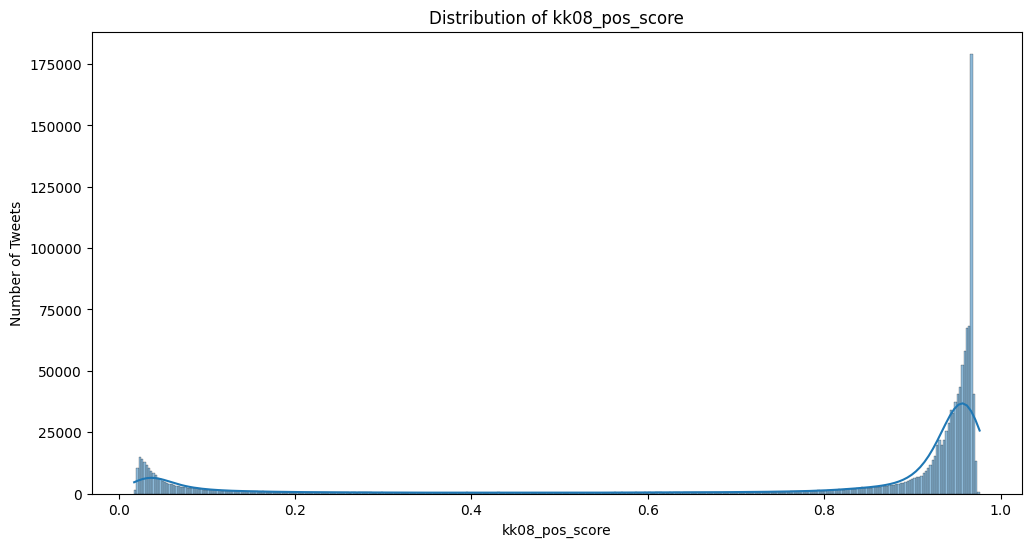

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.histplot(df['kk08_pos_score'], kde=True)
plt.title('Distribution of kk08_pos_score')
plt.xlabel('kk08_pos_score')
plt.ylabel('Number of Tweets')
plt.show()


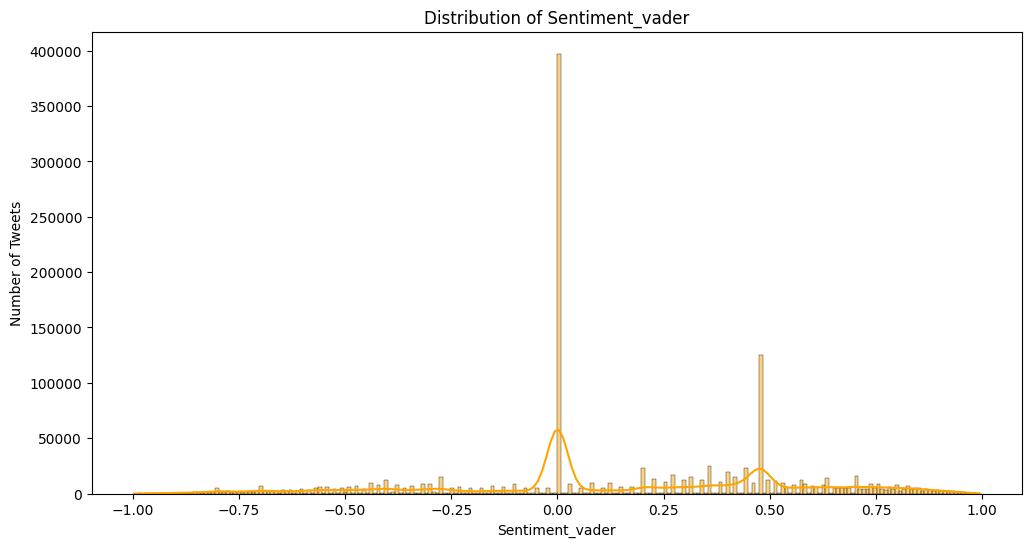

In [ ]:

plt.figure(figsize=(12, 6))
sns.histplot(df['Sentiment_vader'], kde=True, color='orange')
plt.title('Distribution of Sentiment_vader')
plt.xlabel('Sentiment_vader')
plt.ylabel('Number of Tweets')
plt.show()


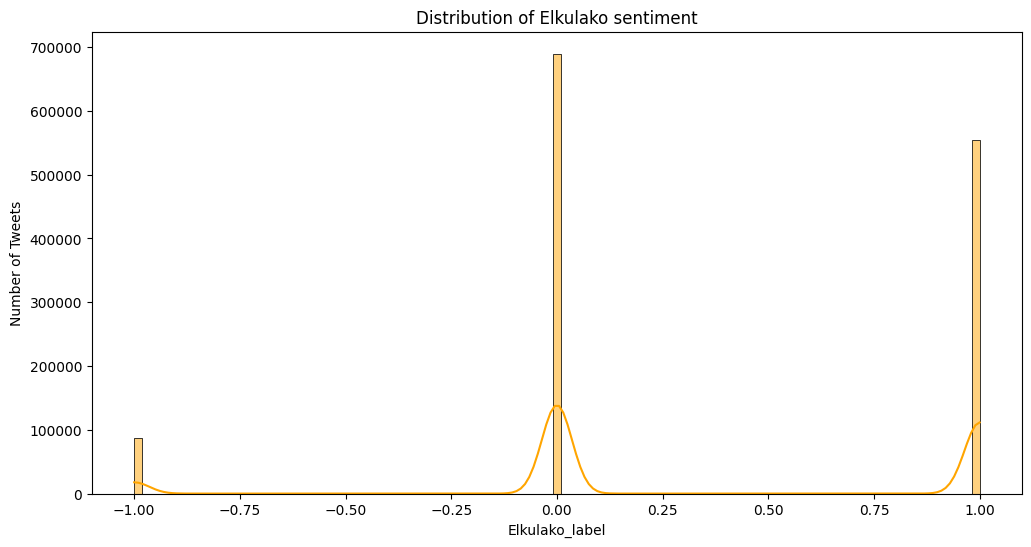

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.histplot(df['Elkulako_label'], kde=True, color='orange')
plt.title('Distribution of Elkulako sentiment')
plt.xlabel('Elkulako_label')
plt.ylabel('Number of Tweets')
plt.show()
# also tends to neutrality, but looks the most balanced

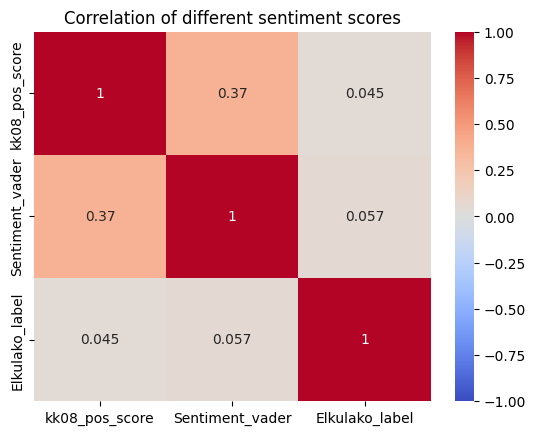

In [ ]:
corr = df[['kk08_pos_score', 'Sentiment_vader', 'Elkulako_label']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation of different sentiment scores')
plt.show()
# only vader and kk08 are correlated


# Relationship with return

In [8]:
df_15m = pd.read_csv("Full_data_15m.csv")
df_30m = pd.read_csv("Full_data_30m.csv")
df_1H = pd.read_csv("Full_data_1H.csv")



In [9]:
return_sign_shares_15m = df_15m['Return_sign'].value_counts(normalize=True)
return_sign_shares_30m = df_30m['Return_sign'].value_counts(normalize=True)
return_sign_shares_1H = df_1H['Return_sign'].value_counts(normalize=True)

In [10]:
return_sign_shares_15m

Return_sign
0    0.513777
1    0.486223
Name: proportion, dtype: float64

In [11]:
return_sign_shares_30m

Return_sign
0    0.501344
1    0.498656
Name: proportion, dtype: float64

In [12]:
return_sign_shares_1H

Return_sign
1    0.512097
0    0.487903
Name: proportion, dtype: float64

everything is more or less balanced

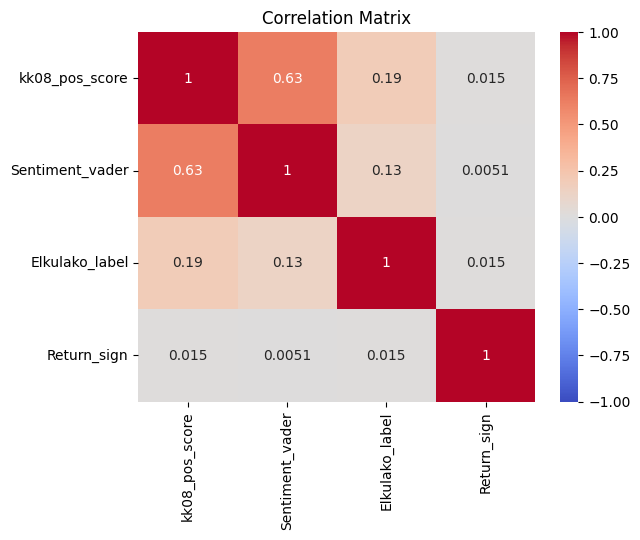

In [ ]:
corr = df_15m[['kk08_pos_score', 'Sentiment_vader','Elkulako_label', 'Return_sign']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()
# more correlated when aggregating

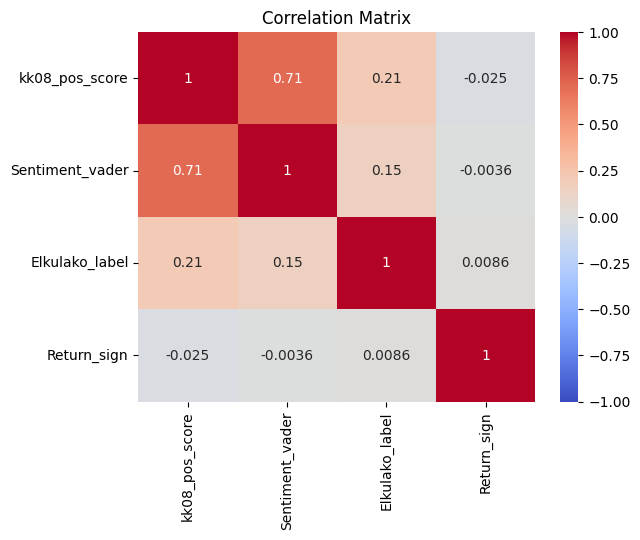

In [15]:
corr = df_30m[['kk08_pos_score', 'Sentiment_vader', 'Elkulako_label', 'Return_sign']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

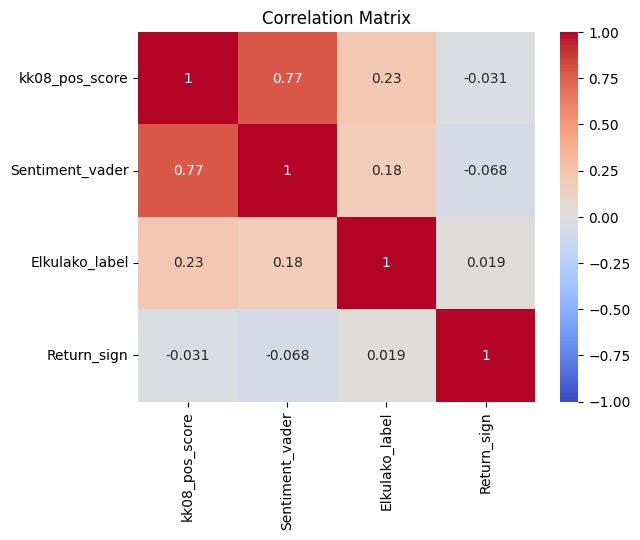

In [ ]:
corr = df_1H[['kk08_pos_score', 'Sentiment_vader','Elkulako_label', 'Return_sign']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()
# the more aggreagted data is - the more is correlation between sentiments

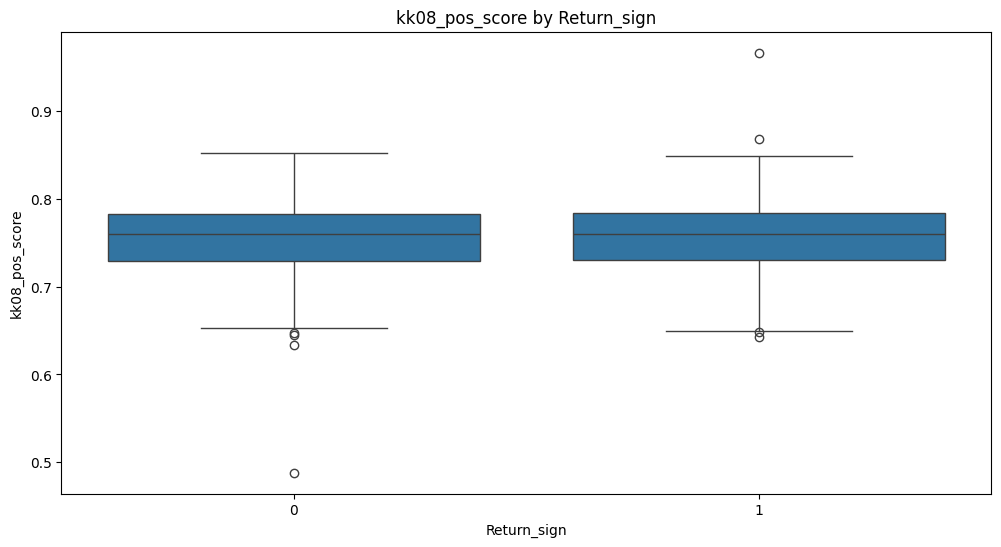

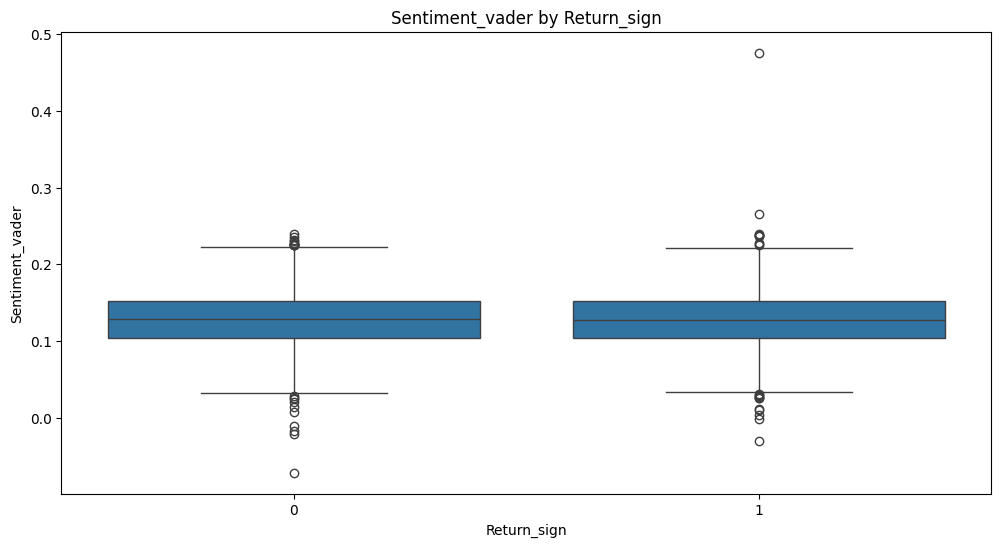

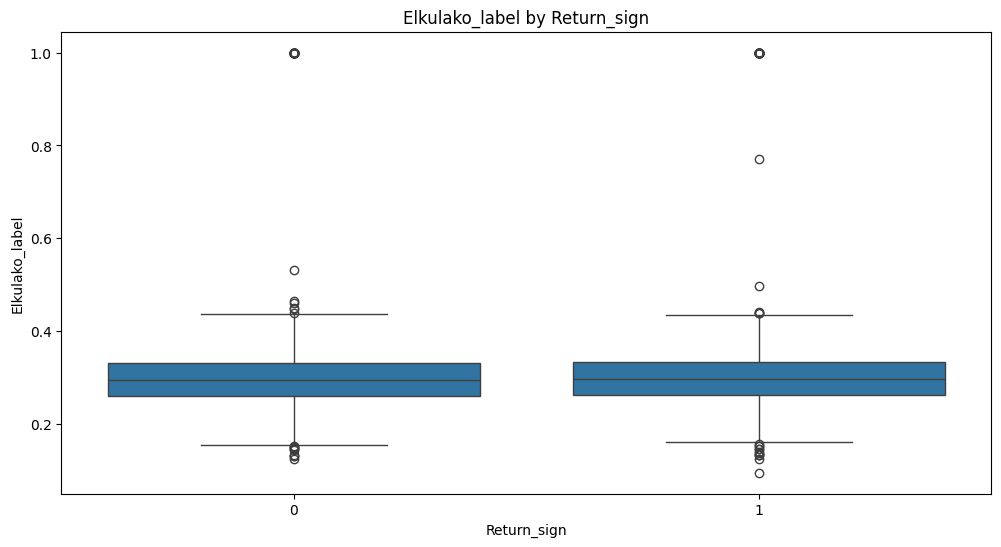

In [ ]:
# compare average sentiment for each class
plt.figure(figsize=(12, 6))
sns.boxplot(x='Return_sign', y='kk08_pos_score', data=df_15m)
plt.title('kk08_pos_score by Return_sign')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Return_sign', y='Sentiment_vader', data=df_15m)
plt.title('Sentiment_vader by Return_sign')
plt.show()


plt.figure(figsize=(12, 6))
sns.boxplot(x='Return_sign', y='Elkulako_label', data=df_15m)
plt.title('Elkulako_label by Return_sign')
plt.show()
# don't differ

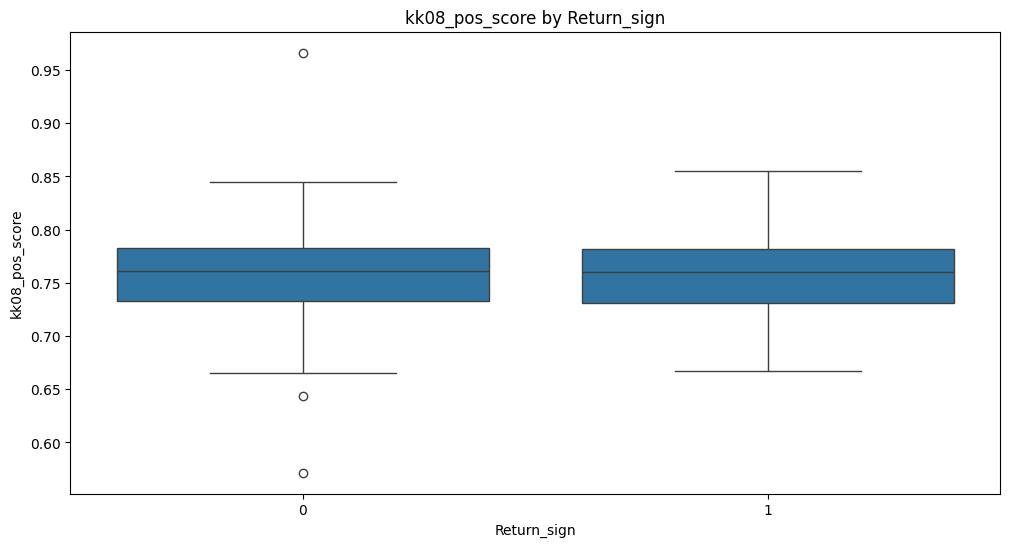

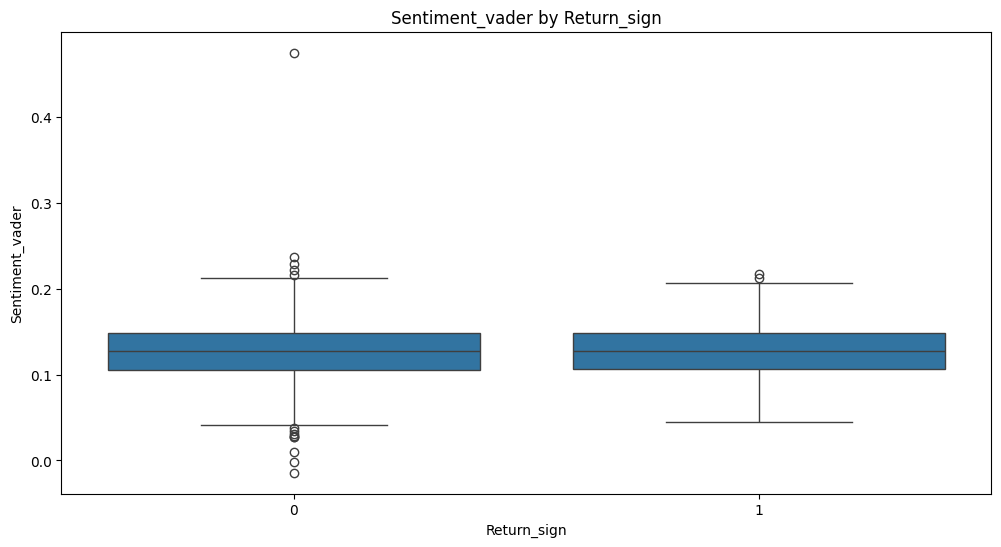

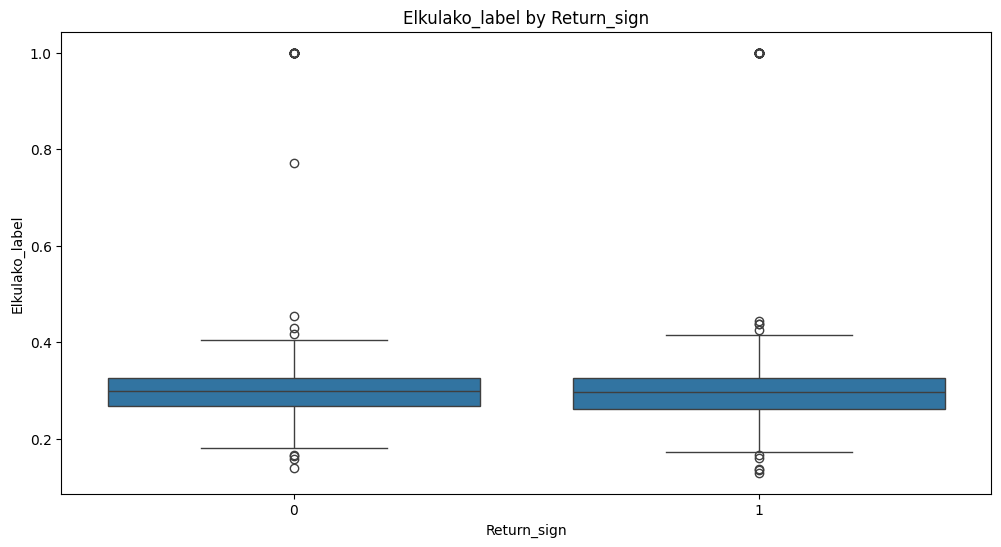

In [19]:
# compare average sentiment for each class
plt.figure(figsize=(12, 6))
sns.boxplot(x='Return_sign', y='kk08_pos_score', data=df_30m)
plt.title('kk08_pos_score by Return_sign')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Return_sign', y='Sentiment_vader', data=df_30m)
plt.title('Sentiment_vader by Return_sign')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Return_sign', y='Elkulako_label', data=df_30m)
plt.title('Elkulako_label by Return_sign')
plt.show()
# don't differ

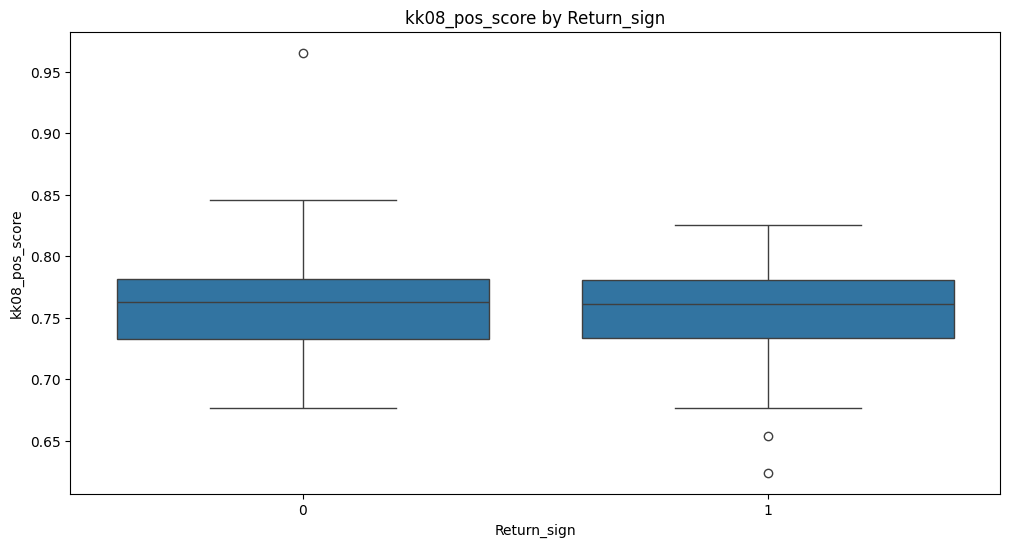

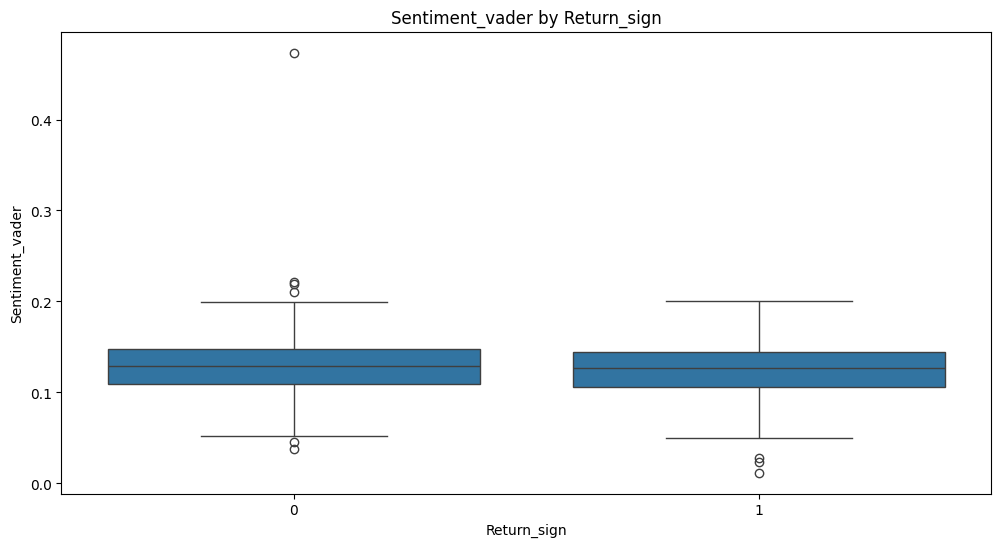

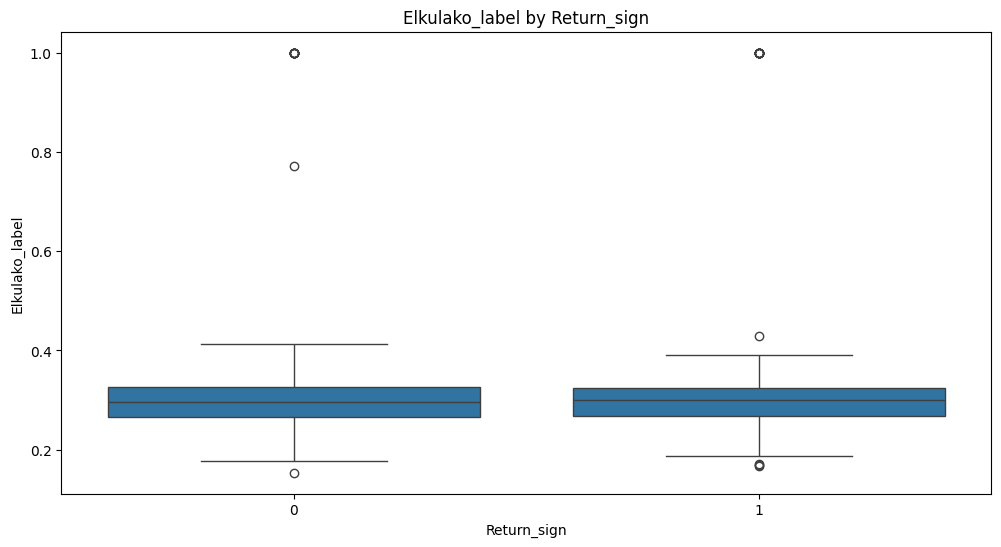

In [20]:
# compare average sentiment for each class
plt.figure(figsize=(12, 6))
sns.boxplot(x='Return_sign', y='kk08_pos_score', data=df_1H)
plt.title('kk08_pos_score by Return_sign')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Return_sign', y='Sentiment_vader', data=df_1H)
plt.title('Sentiment_vader by Return_sign')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Return_sign', y='Elkulako_label', data=df_1H)
plt.title('Elkulako_label by Return_sign')
plt.show()
# don't differ